In [146]:
from typing import Literal
from pandas import read_csv
from matplotlib.pyplot import show, title, ticklabel_format, xticks, xlabel, ylabel, grid, legend, plot

In [147]:
def show_plot_for(category: Literal["developers", "organizations", "repositories"]):
	df = read_csv(f"./data/{category}.csv")
	group = df.groupby(["year", "quarter"])[category].sum().reset_index(name='count')
	group["year_quarter"] = group["year"].astype(str) + ' Q' + group["quarter"].astype(str)
	plot(group["year_quarter"], group["count"], "-o")
	xticks(rotation=45)
	ticklabel_format(axis='y', style="plain")
	grid(True)
	xlabel("Year & Quarter")
	ylabel(f"# of {category}")
	title(f"# of GitHub {category} Over Time")
	show()

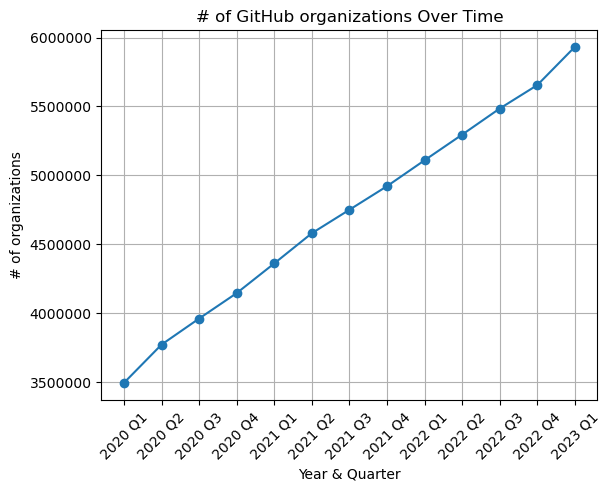

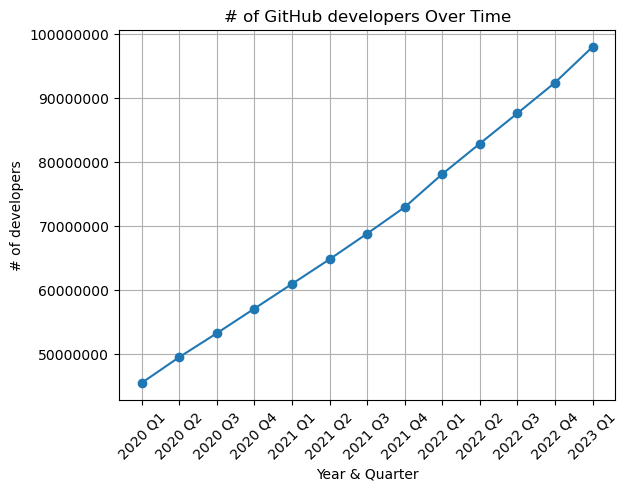

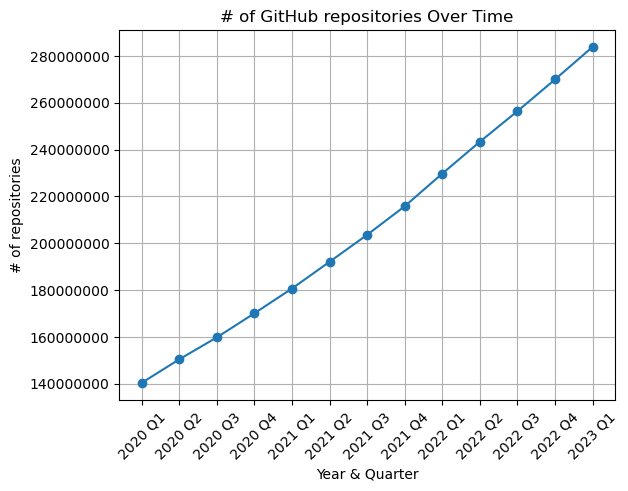

In [148]:
show_plot_for("organizations")
show_plot_for("developers")
show_plot_for("repositories")

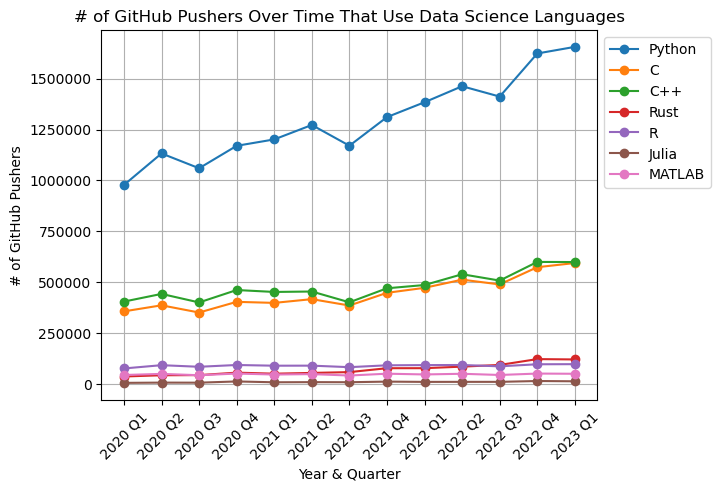

In [156]:
languages = ["Python", "C", "C++", "Rust", "R", "Julia", "MATLAB"]
# languages = ["R", "Julia", "MATLAB"]
# languages = ["C++"]
languages_df = read_csv("./data/languages.csv")
for language in languages:
	df = languages_df[languages_df["language"] == language].groupby(["year", "quarter"])["num_pushers"].sum().reset_index(name='count')
	df["year_quarter"] = df["year"].astype(str) + ' Q' + df["quarter"].astype(str)
	plot(df["year_quarter"], df["count"], "-o", label=language)
xticks(rotation=45)
ticklabel_format(axis='y', style="plain")
grid(True)
legend(loc="best", bbox_to_anchor=(1, 1))
xlabel("Year & Quarter")
ylabel(f"# of GitHub Pushers")
title(f"# of GitHub Pushers Over Time That Use Data Science Languages")
show()